# AMHE Centroid Influence

__Richard Staszkiewicz__

__Igor Matynia__

The notebook is supposed to be run on Google Collaboratory. It explores the influence the different centroid counting has on the DES algorithm performnnce. The algorithm is faced with an optimization problem of the chosen benchmark functions accessed with curtasy of [Axel Thevenot](https://github.com/AxelThevenot/Python_Benchmark_Test_Optimization_Function_Single_Objective).

In [15]:
!git clone https://github.com/AxelThevenot/Python_Benchmark_Test_Optimization_Function_Single_Objective.git
!mkdir results

fatal: destination path 'Python_Benchmark_Test_Optimization_Function_Single_Objective' already exists and is not an empty directory.


mkdir: cannot create directory ‘results’: File exists


In [16]:
from modules.DES import des_classic
from modules.centroids import *
from modules.trial_runner import *
import numpy as np
import os
np.random.seed(999)

## Example test rundown

In [17]:
# par = [-100, -100, -100, -100]
# fn = (
#     lambda x: x[0] ** 2 + x[1] ** 2 + x[2] ** 2 + x[3] ** 2
# )  # Example fitness function
# kwargs = {
#     "upper": np.array([-5, -23.3, 14, 11]),
#     "lower": np.array([-101, -101, -101, -150]),
#     "stopfitness": 1e-10,
#     "lambda": 5,
#     "time": 5,
#     "centroid_fc": mean_centroid,
#     "diag": True,
# } # additional arguments
# for c in [vanila_centroid,  mean_centroid, median_centroid, interquartile_centroid, windsor_centroid]:
#     kwargs['centroid_fc'] = c
#     result = des_classic(par, fn, **kwargs)
#     print(result['par'])

## Trials with real functions

In [18]:
import Python_Benchmark_Test_Optimization_Function_Single_Objective.pybenchfunction as bench

### Testing the sufficiency of the bench functions

In [19]:
# for f in bench.get_functions(None):
#     f = f(2)
#     if not f.is_dim_compatible(2):
#         print(f'{f}: {f.is_dim_compatible(2)}')

In [20]:
# x = []
# for f in bench.get_functions(None):
#     f = f(2)
#     x.append(f.input_domain)
# np.unique(x)

In [21]:
# for f in bench.get_functions(None):
#     try:
#         f = f(2)
#         x_min, m = f.get_global_minimum(2)
#         if x_min.any() > 100 or x_min.any() <-100:
#             print(x_min)
#     except Exception as e:
#         print(f'Unable to check the global minimum of: {f.name}')

### Creating the default arguments of the DES

In [22]:
default_params = {
    "upper": np.array([101, 101]),
    "lower": np.array([-101, -101]),
    "stopfitness": 1e-10,
    "lambda": 20,
    "time": 5,
    "diag": True,
}
repetitions = 1
dims = [10]

def filter_func(func):
    return func.is_dim_compatible(max(dims))

n_dimentional_funcs = list(filter(
        filter_func, 
        bench.get_functions(None)
))[0:5]

config = TrialConfig.from_product(
    n_dimentional_funcs,
    dims,
    ALL_CENTROIDS[0:3],
    default_params, 
    repetitions,
)
print(f"Config prepared, n_experiments={len(config.experiments)}")

WARNING ! Is only is available for d=2
WARNING ! Is only is available for d=2
WARNING ! Is only is available for d=2
Config prepared, n_experiments=15


### Trials

In [23]:
runner = TrialRunner(config)
runner.run_all()

Processing Ackley N. 4 @ dim=10, centr=mean_centroid, rep=0Processing Ackley @ dim=10, centr=vanila_centroid, rep=0Processing Ackley @ dim=10, centr=mean_centroid, rep=0Processing Ackley @ dim=10, centr=median_centroid, rep=0Processing Ackley N. 4 @ dim=10, centr=vanila_centroid, rep=0Processing Alpine N. 1 @ dim=10, centr=median_centroid, rep=0Processing Alpine N. 2 @ dim=10, centr=vanila_centroid, rep=0Processing Alpine N. 1 @ dim=10, centr=vanila_centroid, rep=0Processing Ackley N. 4 @ dim=10, centr=median_centroid, rep=0Processing Alpine N. 2 @ dim=10, centr=mean_centroid, rep=0



Processing Alpine N. 2 @ dim=10, centr=median_centroid, rep=0


Processing Alpine N. 1 @ dim=10, centr=mean_centroid, rep=0






Processing Brown @ dim=10, centr=vanila_centroid, rep=0Processing Brown @ dim=10, centr=mean_centroid, rep=0Processing Brown @ dim=10, centr=median_centroid, rep=0




## Example vizualizations

In [24]:
path = TrialResult.get_path_from_parts(mean_centroid, bench.function.Ackley, 3, 0)
des = np.load(f"{path}.npy", allow_pickle=True)[()]

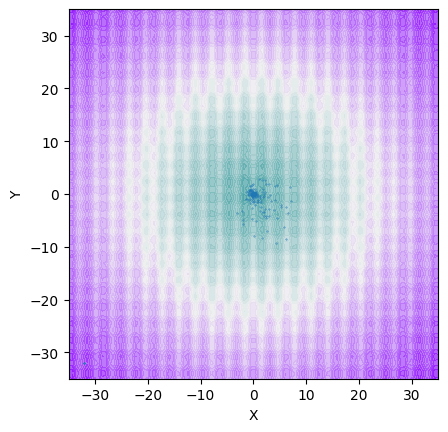

In [25]:
import matplotlib.pyplot as plt
x = bench.function.AckleyN4(2)
bench.plot_2d(x, n_space=100, ax=None, show=False)
plt.scatter(des['diagnostic']['meanCord'].T[0], des['diagnostic']['meanCord'].T[1], s=0.1)
plt.show()

## Compressing visualisations for all functions

In [26]:
for f in bench.get_functions(None):
    try:
        f = f(2)
        x_min, m = f.get_global_minimum(2)
        fig, axs = plt.subplots(3, 2, figsize=(10, 15))
        fig.suptitle(f"{f.name}", fontsize=32, fontweight=20, va="center", ha='center')
        axs[2, 1].set_yscale("log")
        axs[2, 1].set_title("Convergence Curves")
        axs[2, 1].axhline(y = m, color = 'r', linestyle = '--', linewidth=3)

        for i, c in enumerate([vanila_centroid,  mean_centroid, median_centroid, interquartile_centroid, windsor_centroid]):
            results = np.load(f'./results/{c.__qualname__}/{f.name}.npy', allow_pickle=True)[()]
            bench.plot_2d(f, n_space=100, ax=axs[i//2, i%2], show=False)
            axs[i//2, i%2].scatter(results['diagnostic']['meanCord'].T[0], results['diagnostic']['meanCord'].T[1], s=0.1, color='black')
            #axs[i//2, i%2].scatter(x_min[0], x_min[1], 'ro', s=0.2)
            axs[i//2, i%2].set_title(f"{c.__qualname__}")
            axs[2, 1].plot(range(len(results['diagnostic']['bestVal'])), results['diagnostic']['bestVal'], label=f"{c.__qualname__}")

        axs[2, 1].legend()
        plt.savefig(f'results/figures/{f.name}.png')
        fig.clf()
        plt.close(fig)
    except TypeError as e:
        print(f'Unable to check the global minimum of: {f.name}. Function omitted..')
    except FileNotFoundError as e:
        print(f'Unable to locate a results file of: {f.name}. Make sure all your results are saved as in previous code...')
        fig.clf()
        plt.close(fig)
    except Exception as e:
        print(f"[{f.name}] Figure could not be produced due to unsuspected error: {e}")
        if fig:
            fig.clf()
            plt.close(fig)

Unable to locate a results file of: Ackley. Make sure all your results are saved as in previous code...
WARNING ! Is only is available for d=2
Unable to locate a results file of: Ackley N. 4. Make sure all your results are saved as in previous code...
Unable to locate a results file of: Alpine N. 1. Make sure all your results are saved as in previous code...
Unable to locate a results file of: Alpine N. 2. Make sure all your results are saved as in previous code...
Unable to locate a results file of: Brown. Make sure all your results are saved as in previous code...
Unable to locate a results file of: Dixon Price. Make sure all your results are saved as in previous code...
Unable to locate a results file of: Exponential. Make sure all your results are saved as in previous code...
Unable to locate a results file of: Griewank. Make sure all your results are saved as in previous code...
Unable to locate a results file of: Happy Cat. Make sure all your results are saved as in previous code